In [1]:
import matplotlib.pyplot as plt
import numpy as np
from photutils import centroid_com
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

from tools import *
from tools.mapping import *
from tools.image import *

In [2]:
def open_img(path, ext = 'sci'):
    #shield against non-string inputs
    path = str(path)
    ext_dict = {
        'sci': 1, 
        }
    if ext in ext_dict:
        ext = ext_dict[ext]
        
    
    file = get_pkg_data_filename(path)
    fitsdata = fits.open(file)
    imgdata = fits.getdata(file, ext=1)
    fitshdr = fitsdata[0].header
    scihdr = fitsdata[1].header
    return imgdata, fitshdr, scihdr

In [3]:
#RUN ME BEFORE ANYTHING ELSE!!! I import all of the required modules and functions!!
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()
print('Imported and initialised matplotlib...')
import astropy.io.fits as ast
print('Imported Astropy...')
from MapFunc import *
print('Imported User Defined Functions...')
from tools.mapping import *
print("Imported Oliver King's tools, v1.4 ...")
col = 'viridis'
xcol = 'red'
lvls = 1000
print("Graphical Parameters initialised...")
print('All Modules Imported Successfully!')

Imported and initialised matplotlib...
Imported Astropy...
Imported User Defined Functions...
Imported Oliver King's tools, v1.4 ...
Graphical Parameters initialised...
All Modules Imported Successfully!


(-0.5, 515.5, 542.5, -0.5)

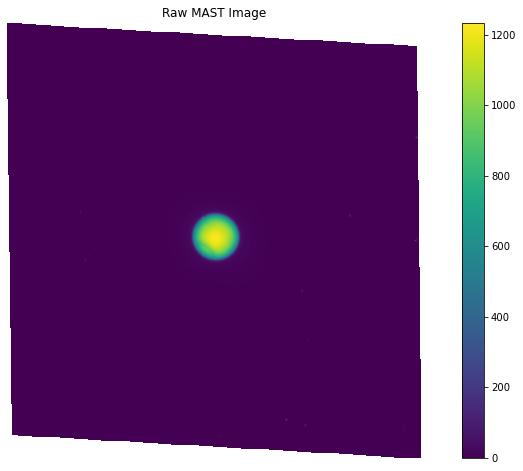

In [4]:
img, hdr, scihdr = open_img('data/2011/467/ibol04etq_drz.fits')

plt.figure(figsize=(15,8))
ax1 = plt.subplot(111)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

In [5]:
# def open_WFPC2_img(path):
#     #shield against non-string inputs
#     path = str(path)
    
#     file = get_pkg_data_filename(path)
#     fitsdata = fits.open(file)
#     ast.info(file)
#     return fitsdata

In [6]:
# file, hdr, scihdr = open_img('data/2008/HLA/hst_05329_01_wfpc2_f467m_pc/hst_05329_01_wfpc2_f467m_pc_drz.fits')
# #print(file)
# plt.figure(figsize=(15,8))
# ax1 = plt.subplot(221)
# im = ax1.imshow(file, cmap=col)
# plt.title('Raw MAST Image')
# plt.colorbar(im)
# ax1.axis('off')

# Image Picker
After the realisation that the Hubble Legacy Archive (HLA) data from the MAST archive was of a VERY similar format to the data taken by WFC3, in a packaged drz file, with extension 1 as the science data file, it rendered the first part of the notebook useless. However, when I opened the images in GIMP to determine which images from each filter that I wanted to use, I noticed that they seemed dark, and needed opening up, and despiking. That is what the code beneath this info does. 

C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\MapFunc.py:98: RuntimeWarning: invalid value encountered in power
  img_corr = img/((mu**(k-1))

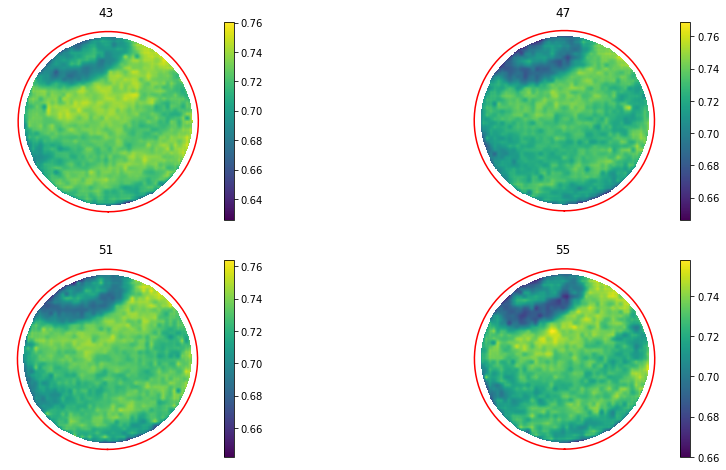

In [7]:
mfac = 0.88

img, hdr, scihdr = open_img('data/2008/467/hst_11156_43_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

plt.figure(figsize=(15,8))
ax4 = plt.subplot(221)
im4 = ax4.imshow(img, cmap=col)
plt.title('43')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.88

img, hdr, scihdr = open_img('data/2008/467/hst_11156_47_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(222)
im4 = ax4.imshow(img, cmap=col)
plt.title('47')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.88

img, hdr, scihdr = open_img('data/2008/467/hst_11156_51_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(223)
im4 = ax4.imshow(img, cmap=col)
plt.title('51')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.88

img, hdr, scihdr = open_img('data/2008/467/hst_11156_55_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('55')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')
plt.show()


C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\MapFunc.py:98: RuntimeWarning: invalid value encountered in power
  img_corr = img/((mu**(k-1))*(mu0**k))
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 -

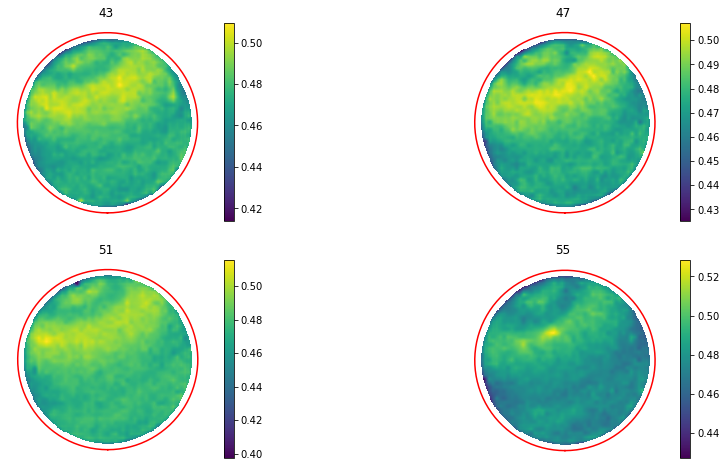

In [8]:
mfac = 0.8

img, hdr, scihdr = open_img('data/2008/547/hst_11156_43_wfpc2_f547m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

plt.figure(figsize=(15,8))
ax4 = plt.subplot(221)
im4 = ax4.imshow(img, cmap=col)
plt.title('43')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2008/547/hst_11156_47_wfpc2_f547m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(222)
im4 = ax4.imshow(img, cmap=col)
plt.title('47')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2008/547/hst_11156_51_wfpc2_f547m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(223)
im4 = ax4.imshow(img, cmap=col)
plt.title('51')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2008/547/hst_11156_55_wfpc2_f547m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('55')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')
plt.show()


C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\MapFunc.py:98: RuntimeWarning: invalid value encountered in power
  img_corr = img/((mu**(k-1))*(mu0**k))
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\MapFunc.py:98: RuntimeWarning: invalid value encountered in power
  img_corr = img/((mu**(k-1))*(mu0**k)

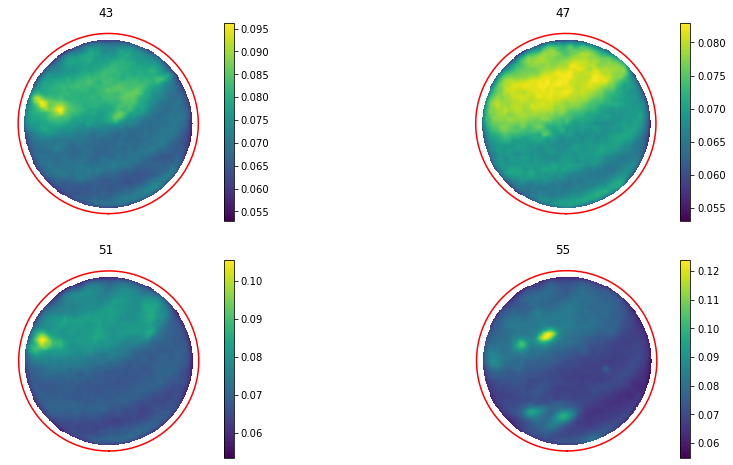

In [9]:
mfac = 0.3

img, hdr, scihdr = open_img('data/2008/CH4/hst_11156_43_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

plt.figure(figsize=(15,8))
ax4 = plt.subplot(221)
im4 = ax4.imshow(img, cmap=col)
plt.title('43')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2008/CH4/hst_11156_47_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(222)
im4 = ax4.imshow(img, cmap=col)
plt.title('47')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2008/CH4/hst_11156_51_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(223)
im4 = ax4.imshow(img, cmap=col)
plt.title('51')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2008/CH4/hst_11156_55_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('55')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')
plt.show()


C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\MapFunc.py:98: RuntimeWarning: invalid value encountered in power
  img_corr = img/((mu**(k-1))*(mu0**k))
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\MapFunc.py:98: RuntimeWarning: invalid value encountered in power
  img_corr = img/((mu**(k-1))*(mu0**k)

(-0.5, 205.5, 205.5, -0.5)

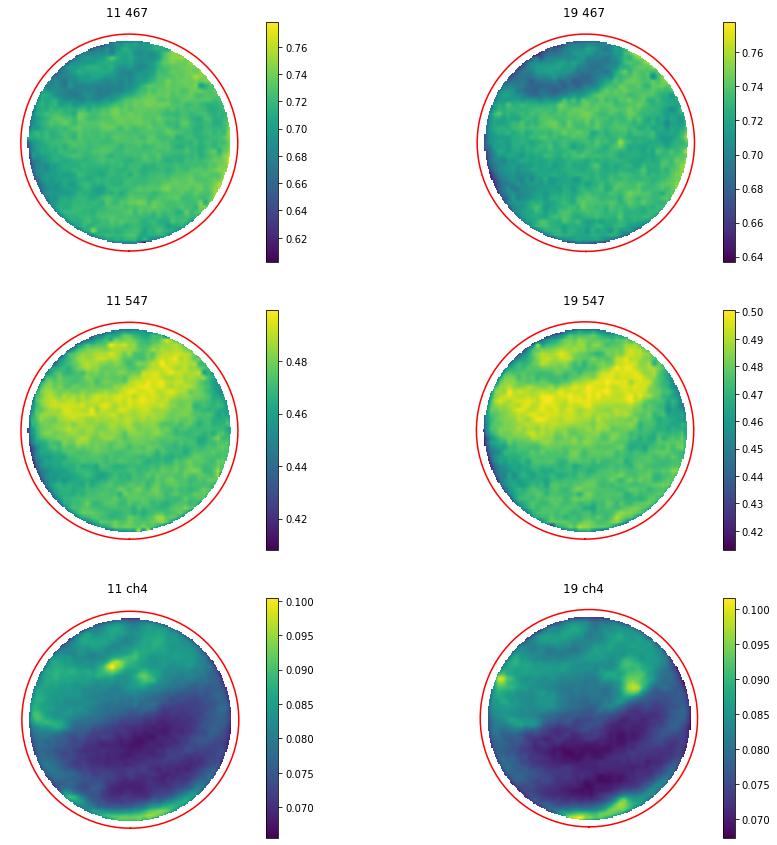

In [10]:
mfac = 0.88

img, hdr, scihdr = open_img('data/2006/467/hst_10534_11_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

plt.figure(figsize=(15,15))
ax4 = plt.subplot(321)
im4 = ax4.imshow(img, cmap=col)
plt.title('11 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2006/467/hst_10534_19_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(322)
im4 = ax4.imshow(img, cmap=col)
plt.title('19 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.8

img, hdr, scihdr = open_img('data/2006/547/hst_10534_11_wfpc2_f547m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(323)
im4 = ax4.imshow(img, cmap=col)
plt.title('11 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2006/547/hst_10534_19_wfpc2_f547m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(324)
im4 = ax4.imshow(img, cmap=col)
plt.title('19 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.4

img, hdr, scihdr = open_img('data/2006/CH4/hst_10534_11_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(325)
im4 = ax4.imshow(img, cmap=col)
plt.title('11 ch4')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2006/CH4/hst_10534_19_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(326)
im4 = ax4.imshow(img, cmap=col)
plt.title('19 ch4')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\MapFunc.py:98: RuntimeWarning: invalid value encountered in power
  img_corr = img/((mu**(k-1))*(mu0**k))
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\MapFunc.py:98: RuntimeWarning: invalid value encountered in power
  img_corr = img/((mu**(k-1))*(mu0**k)

(-0.5, 197.5, 197.5, -0.5)

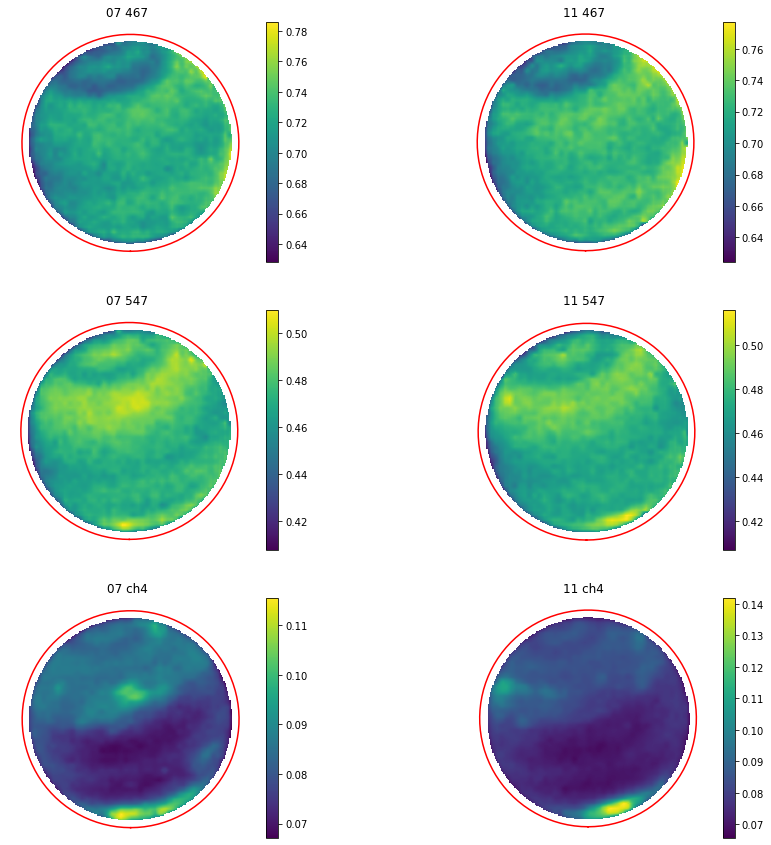

In [11]:
mfac = 0.88

img, hdr, scihdr = open_img('data/2005/467/hst_10170_07_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

plt.figure(figsize=(15,15))
ax4 = plt.subplot(321)
im4 = ax4.imshow(img, cmap=col)
plt.title('07 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2005/467/hst_10170_11_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(322)
im4 = ax4.imshow(img, cmap=col)
plt.title('11 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.8

img, hdr, scihdr = open_img('data/2005/547/hst_10170_07_wfpc2_f547m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(323)
im4 = ax4.imshow(img, cmap=col)
plt.title('07 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2005/547/hst_10170_11_wfpc2_f547m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(324)
im4 = ax4.imshow(img, cmap=col)
plt.title('11 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.4

img, hdr, scihdr = open_img('data/2005/CH4/hst_10170_07_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(325)
im4 = ax4.imshow(img, cmap=col)
plt.title('07 ch4')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2005/CH4/hst_10170_11_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(326)
im4 = ax4.imshow(img, cmap=col)
plt.title('11 ch4')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\MapFunc.py:98: RuntimeWarning: invalid value encountered in power
  img_corr = img/((mu**(k-1))*(mu0**k))
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 -

(-0.5, 197.5, 197.5, -0.5)

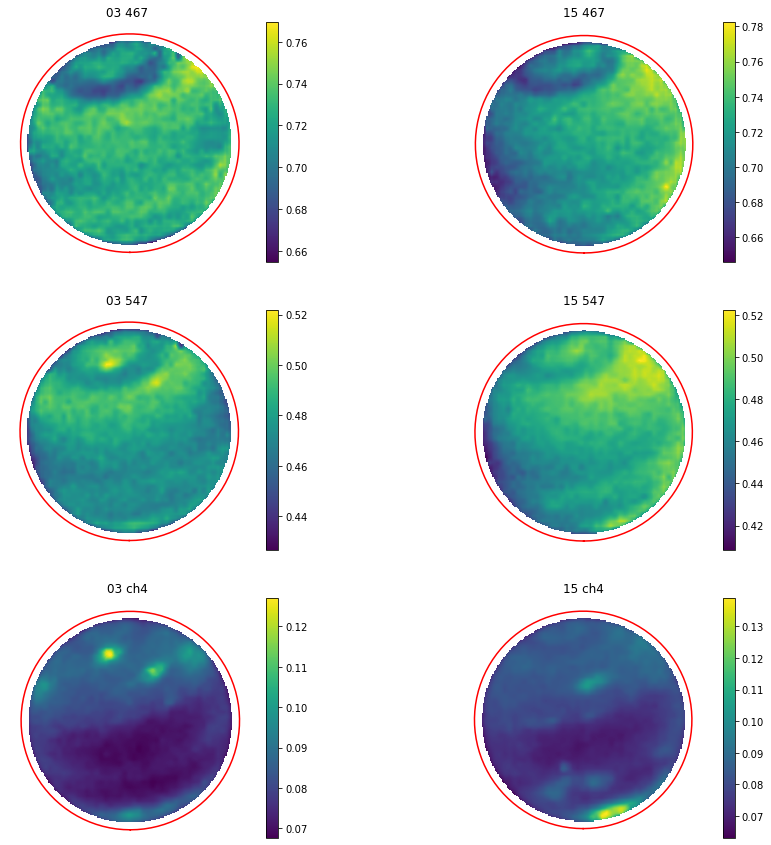

In [12]:
mfac = 0.88

img, hdr, scihdr = open_img('data/2004/467/hst_10170_03_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

plt.figure(figsize=(15,15))
ax4 = plt.subplot(321)
im4 = ax4.imshow(img, cmap=col)
plt.title('03 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2004/467/hst_10170_15_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(322)
im4 = ax4.imshow(img, cmap=col)
plt.title('15 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.8

img, hdr, scihdr = open_img('data/2004/547/hst_10170_03_wfpc2_f547m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(323)
im4 = ax4.imshow(img, cmap=col)
plt.title('03 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2004/547/hst_10170_15_wfpc2_f547m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(324)
im4 = ax4.imshow(img, cmap=col)
plt.title('15 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.4

img, hdr, scihdr = open_img('data/2004/CH4/hst_10170_03_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(325)
im4 = ax4.imshow(img, cmap=col)
plt.title('03 ch4')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2004/CH4/hst_10170_15_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(326)
im4 = ax4.imshow(img, cmap=col)
plt.title('15 ch4')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)


(-0.5, 4799.5, 4799.5, -0.5)

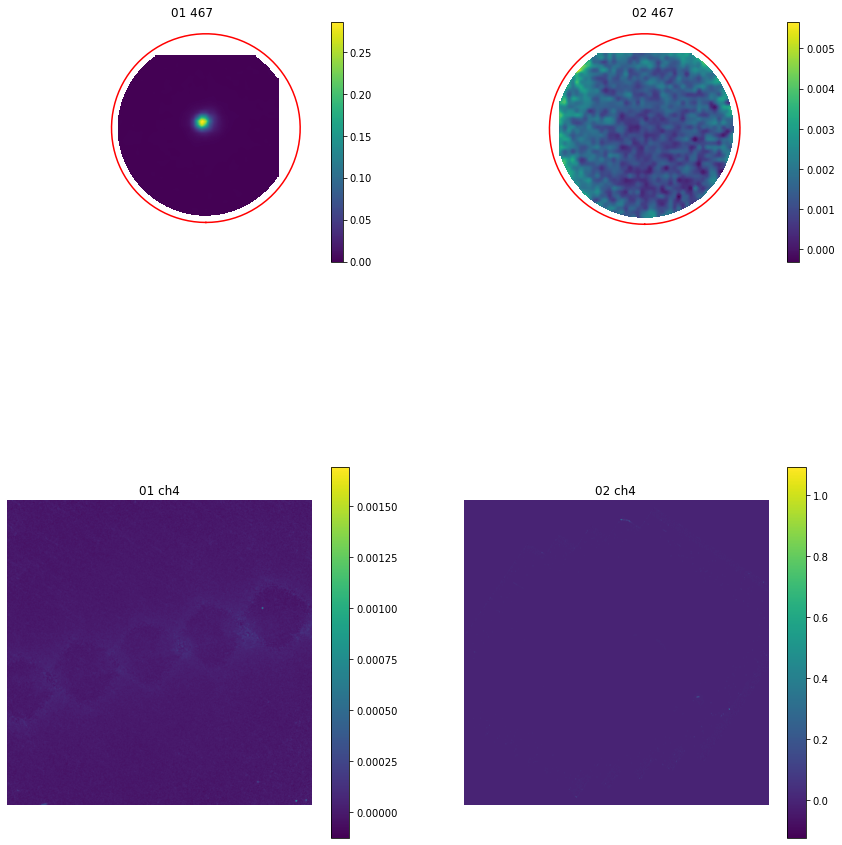

In [13]:
#YEAR 2002 LOOKS VERY BROKEN. SOMETHING WEIRD MUST HAVE HAPPENED IN THEIR IMAGE PIPELINE
mfac = 0.88

img, hdr, scihdr = open_img('data/2002/467/hst_09393_01_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

plt.figure(figsize=(15,15))
ax4 = plt.subplot(321)
im4 = ax4.imshow(img, cmap=col)
plt.title('01 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2002/467/hst_09393_02_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(322)
im4 = ax4.imshow(img, cmap=col)
plt.title('02 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.4

img, hdr, scihdr = open_img('data/2002/CH4/hst_09393_01_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)
img = img[500:(img.shape[0]-500),500:(img.shape[1]-500)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
#img, y, x = circ(img,rad)
#img, planicentre = get_planicentre(img,rad)

#img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(223)
im4 = ax4.imshow(img, cmap=col)
plt.title('01 ch4')
#ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2002/CH4/hst_09393_02_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
#img, y, x = circ(img,rad)
#img, planicentre = get_planicentre(img,rad)

#img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('02 ch4')
#ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\MapFunc.py:98: RuntimeWarning: invalid value encountered in power
  img_corr = img/((mu**(k-1))*(mu0**k))
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\MapFunc.py:98: RuntimeWarning: invalid value encountered in power
  img_corr = img/((mu**(k-1))*(mu0**k)

(-0.5, 205.5, 205.5, -0.5)

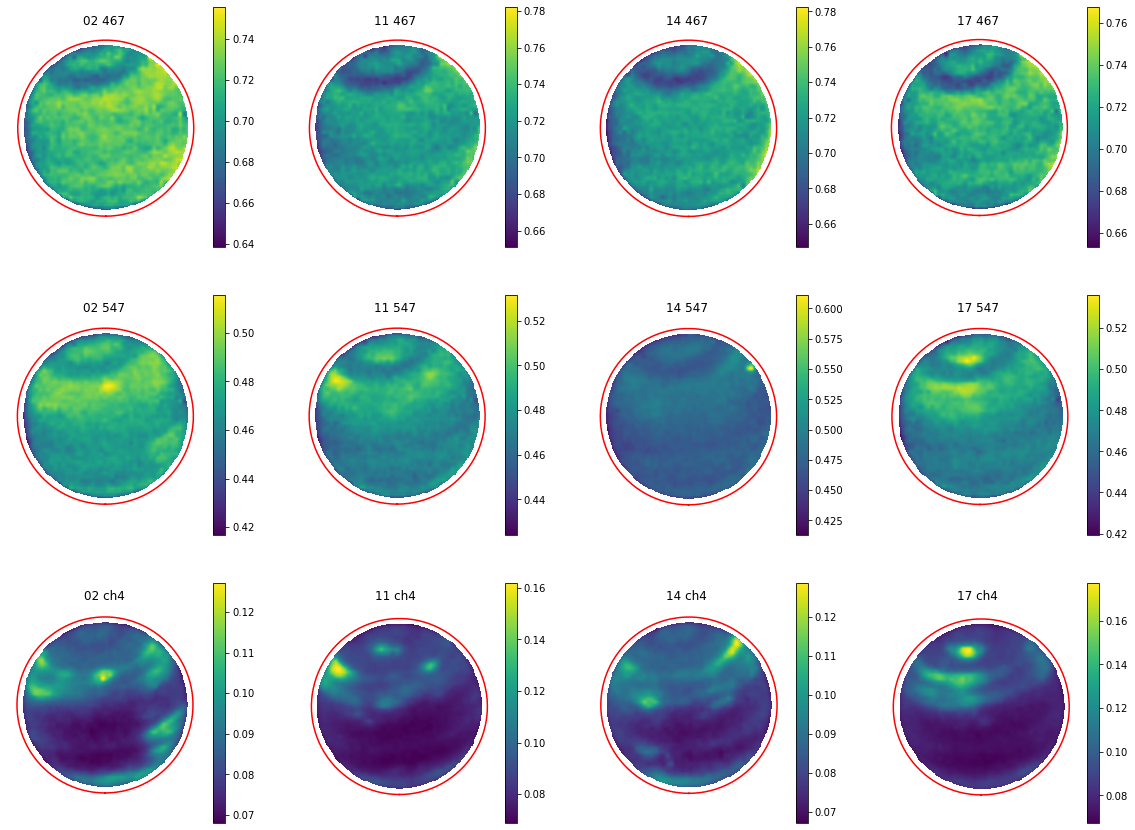

In [14]:
mfac = 0.88

img, hdr, scihdr = open_img('data/2001/467/hst_08634_02_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

plt.figure(figsize=(20,15))
ax4 = plt.subplot(341)
im4 = ax4.imshow(img, cmap=col)
plt.title('02 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2001/467/hst_08634_11_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(342)
im4 = ax4.imshow(img, cmap=col)
plt.title('11 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2001/467/hst_08634_14_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(343)
im4 = ax4.imshow(img, cmap=col)
plt.title('14 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2001/467/hst_08634_17_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(344)
im4 = ax4.imshow(img, cmap=col)
plt.title('17 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.8

img, hdr, scihdr = open_img('data/2001/547/hst_08634_02_wfpc2_f547m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(345)
im4 = ax4.imshow(img, cmap=col)
plt.title('02 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2001/547/hst_08634_11_wfpc2_f547m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(346)
im4 = ax4.imshow(img, cmap=col)
plt.title('11 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2001/547/hst_08634_14_wfpc2_f547m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(347)
im4 = ax4.imshow(img, cmap=col)
plt.title('14 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2001/547/hst_08634_17_wfpc2_f547m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(348)
im4 = ax4.imshow(img, cmap=col)
plt.title('17 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.4

img, hdr, scihdr = open_img('data/2001/CH4/hst_08634_02_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(349)
im4 = ax4.imshow(img, cmap=col)
plt.title('02 ch4')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2001/CH4/hst_08634_11_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,10)
im4 = ax4.imshow(img, cmap=col)
plt.title('11 ch4')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2001/CH4/hst_08634_14_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,11)
im4 = ax4.imshow(img, cmap=col)
plt.title('14 ch4')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2001/CH4/hst_08634_17_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,12)
im4 = ax4.imshow(img, cmap=col)
plt.title('17 ch4')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\MapFunc.py:98: RuntimeWarning: invalid value encountered in power
  img_corr = img/((mu**(k-1))*(mu0**k))
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\MapFunc.py:98: RuntimeWarning: invalid value encountered in power
  img_corr = img/((mu**(k-1))*(mu0**k)

(-0.5, 199.5, 199.5, -0.5)

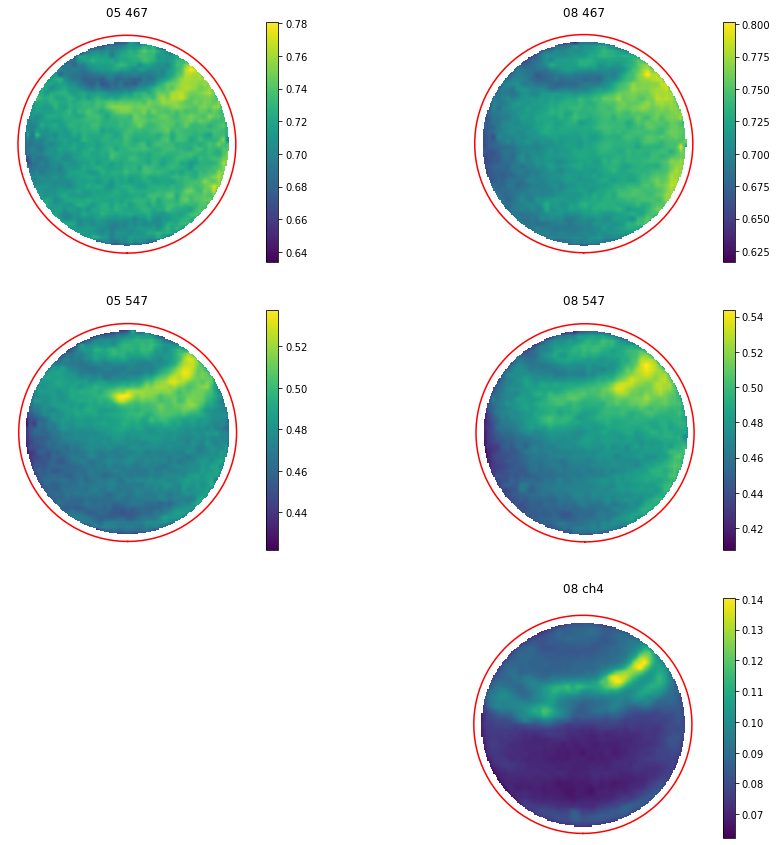

In [15]:
mfac = 0.88

img, hdr, scihdr = open_img('data/2000/467/hst_08634_05_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

plt.figure(figsize=(15,15))
ax4 = plt.subplot(321)
im4 = ax4.imshow(img, cmap=col)
plt.title('05 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2000/467/hst_08634_08_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(322)
im4 = ax4.imshow(img, cmap=col)
plt.title('08 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.8

img, hdr, scihdr = open_img('data/2000/547/hst_08634_05_wfpc2_f547m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(323)
im4 = ax4.imshow(img, cmap=col)
plt.title('05 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2000/547/hst_08634_08_wfpc2_f547m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(324)
im4 = ax4.imshow(img, cmap=col)
plt.title('08 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.4

# img, hdr, scihdr = open_img('data/2000/CH4/hst_08634_05_wfpc2_fqch4n15_pc_drz.fits')
# eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

# IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)
# img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
# img = tools.image.exp_despike(img)
# img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
# pltscl = pltscl/4

# img = img*IF

# rad = float(eph['ang_width'])/(2*pltscl)
# img, y, x = circ(img,rad)
# img, planicentre = get_planicentre(img,rad)

# img = minnaert(img, planicentre, mfac, eph)

# ax4 = plt.subplot(325)
# im4 = ax4.imshow(img, cmap=col)
# plt.title('05 ch4')
# ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
# plt.colorbar(im4)
# ax4.axis('off')

img, hdr, scihdr = open_img('data/2000/CH4/hst_08634_08_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(326)
im4 = ax4.imshow(img, cmap=col)
plt.title('08 ch4')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

In [16]:
# mfac = 0.88

# img, hdr, scihdr = open_img('data/1998/467/hst_07324_01_wfpc2_f467m_pc_drz.fits')
# eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

# IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

# img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
# pltscl = pltscl/4

# img = img*IF

# rad = float(eph['ang_width'])/(2*pltscl)
# img, y, x = circ(img,rad)
# img, planicentre = get_planicentre(img,rad)

# img = minnaert(img, planicentre, mfac, eph)

# plt.figure(figsize=(20,15))
# ax4 = plt.subplot(221)
# im4 = ax4.imshow(img, cmap=col)
# plt.title('01 467')
# ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
# plt.colorbar(im4)
# ax4.axis('off')

# img, hdr, scihdr = open_img('data/1998/467/hst_07324_13_wfpc2_f467m_pc_drz.fits')
# eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

# IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)

# img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
# pltscl = pltscl/4

# img = img*IF

# rad = float(eph['ang_width'])/(2*pltscl)
# img, y, x = circ(img,rad)
# img, planicentre = get_planicentre(img,rad)

# img = minnaert(img, planicentre, mfac, eph)

# ax4 = plt.subplot(222)
# im4 = ax4.imshow(img, cmap=col)
# plt.title('13 467')
# ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
# plt.colorbar(im4)
# ax4.axis('off')

# mfac = 0.4

# img, hdr, scihdr = open_img('data/1998/CH4/hst_07324_01_wfpc2_fqch4n15_pc_drz.fits')
# eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

# IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)
# img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
# img = tools.image.exp_despike(img)
# img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
# pltscl = pltscl/4

# img = img*IF

# rad = float(eph['ang_width'])/(2*pltscl)
# img, y, x = circ(img,rad)
# img, planicentre = get_planicentre(img,rad)

# img = minnaert(img, planicentre, mfac, eph)

# ax4 = plt.subplot(223)
# im4 = ax4.imshow(img, cmap=col)
# plt.title('01 ch4')
# ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
# plt.colorbar(im4)
# ax4.axis('off')

# img, hdr, scihdr = open_img('data/1998/CH4/hst_07324_13_wfpc2_fqch4n15_pc_drz.fits')
# eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

# IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04, 0.05)
# img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
# img = tools.image.exp_despike(img)
# img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
# pltscl = pltscl/4

# img = img*IF

# rad = float(eph['ang_width'])/(2*pltscl)
# img, y, x = circ(img,rad)
# img, planicentre = get_planicentre(img,rad)

# img = minnaert(img, planicentre, mfac, eph)

# ax4 = plt.subplot(224)
# im4 = ax4.imshow(img, cmap=col)
# plt.title('11 ch4')
# ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
# plt.colorbar(im4)
# ax4.axis('off')

URLError: <urlopen error Unable to open any source! Exceptions were {'http://data.astropy.org/data/1998/467/hst_07324_01_wfpc2_f467m_pc_drz.fits': <HTTPError 404: 'Not Found'>, 'http://www.astropy.org/astropy-data/data/1998/467/hst_07324_01_wfpc2_f467m_pc_drz.fits': <HTTPError 404: 'Not Found'>}>

In [ ]:
mfac = 0.88

img, hdr, scihdr = open_img('data/2015/467/icpf27deq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

plt.figure(figsize=(20,15))
ax4 = plt.subplot(341)
im4 = ax4.imshow(img, cmap=col)
plt.title('27 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2015/467/icpf28erq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(342)
im4 = ax4.imshow(img, cmap=col)
plt.title('28 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2015/467/icpf29fwq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(343)
im4 = ax4.imshow(img, cmap=col)
plt.title('29 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2015/467/icpf30gqq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(344)
im4 = ax4.imshow(img, cmap=col)
plt.title('30 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.8

img, hdr, scihdr = open_img('data/2015/547/icpf27dfq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(345)
im4 = ax4.imshow(img, cmap=col)
plt.title('27 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2015/547/icpf28esq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(346)
im4 = ax4.imshow(img, cmap=col)
plt.title('28 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2015/547/icpf29fxq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(347)
im4 = ax4.imshow(img, cmap=col)
plt.title('29 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2015/547/icpf30grq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(348)
im4 = ax4.imshow(img, cmap=col)
plt.title('30 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.4

img, hdr, scihdr = open_img('data/2015/619/icpf27dqq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(349)
im4 = ax4.imshow(img, cmap=col)
plt.title('27 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2015/619/icpf28f2q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,10)
im4 = ax4.imshow(img, cmap=col)
plt.title('28 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2015/619/icpf29g7q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,11)
im4 = ax4.imshow(img, cmap=col)
plt.title('29 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2015/619/icpf30h1q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,12)
im4 = ax4.imshow(img, cmap=col)
plt.title('30 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

In [ ]:
mfac = 0.88

img, hdr, scihdr = open_img('data/2016/467/icwy22cmq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

plt.figure(figsize=(20,15))
ax4 = plt.subplot(341)
im4 = ax4.imshow(img, cmap=col)
plt.title('22 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2016/467/icwy23fxq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(342)
im4 = ax4.imshow(img, cmap=col)
plt.title('23 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2016/467/icwy24jbq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(343)
im4 = ax4.imshow(img, cmap=col)
plt.title('24 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2016/467/icwy25npq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(344)
im4 = ax4.imshow(img, cmap=col)
plt.title('25 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.8

img, hdr, scihdr = open_img('data/2016/547/icwy22cnq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(345)
im4 = ax4.imshow(img, cmap=col)
plt.title('22 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2016/547/icwy23fyq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(346)
im4 = ax4.imshow(img, cmap=col)
plt.title('23 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2016/547/icwy24jhq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(347)
im4 = ax4.imshow(img, cmap=col)
plt.title('24 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2016/547/icwy25nqq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(348)
im4 = ax4.imshow(img, cmap=col)
plt.title('25 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.4

img, hdr, scihdr = open_img('data/2016/619/icwy22d9q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(349)
im4 = ax4.imshow(img, cmap=col)
plt.title('22 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2016/619/icwy23gxq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,10)
im4 = ax4.imshow(img, cmap=col)
plt.title('23 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2016/619/icwy24jyq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,11)
im4 = ax4.imshow(img, cmap=col)
plt.title('24 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2016/619/icwy25odq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,12)
im4 = ax4.imshow(img, cmap=col)
plt.title('25 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

In [ ]:
mfac = 0.88

img, hdr, scihdr = open_img('data/2017/467/id9922buq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

plt.figure(figsize=(20,15))
ax4 = plt.subplot(341)
im4 = ax4.imshow(img, cmap=col)
plt.title('22 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2017/467/id9923d1q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(342)
im4 = ax4.imshow(img, cmap=col)
plt.title('23 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2017/467/id9924dtq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(343)
im4 = ax4.imshow(img, cmap=col)
plt.title('24 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2017/467/id9925elq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(344)
im4 = ax4.imshow(img, cmap=col)
plt.title('25 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.8

img, hdr, scihdr = open_img('data/2017/547/id9922bvq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(345)
im4 = ax4.imshow(img, cmap=col)
plt.title('22 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2017/547/id9923d2q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(346)
im4 = ax4.imshow(img, cmap=col)
plt.title('23 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2017/547/id9924duq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(347)
im4 = ax4.imshow(img, cmap=col)
plt.title('24 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2017/547/id9925emq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(348)
im4 = ax4.imshow(img, cmap=col)
plt.title('25 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.4

img, hdr, scihdr = open_img('data/2017/619/id9922c9q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(349)
im4 = ax4.imshow(img, cmap=col)
plt.title('22 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2017/619/id9923dcq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,10)
im4 = ax4.imshow(img, cmap=col)
plt.title('23 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2017/619/id9924e4q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,11)
im4 = ax4.imshow(img, cmap=col)
plt.title('24 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2017/619/id9925ewq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,12)
im4 = ax4.imshow(img, cmap=col)
plt.title('25 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

In [ ]:
mfac = 0.88

img, hdr, scihdr = open_img('data/2018/467/idg262bnq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

plt.figure(figsize=(20,15))
ax4 = plt.subplot(341)
im4 = ax4.imshow(img, cmap=col)
plt.title('62 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/467/idg263cvq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(342)
im4 = ax4.imshow(img, cmap=col)
plt.title('63 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/467/idg264dxq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(343)
im4 = ax4.imshow(img, cmap=col)
plt.title('64 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/467/idg265etq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(344)
im4 = ax4.imshow(img, cmap=col)
plt.title('65 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.8

img, hdr, scihdr = open_img('data/2018/547/idg262boq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(345)
im4 = ax4.imshow(img, cmap=col)
plt.title('62 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/547/idg263cwq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(346)
im4 = ax4.imshow(img, cmap=col)
plt.title('63 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/547/idg264dyq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(347)
im4 = ax4.imshow(img, cmap=col)
plt.title('64 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/547/idg265euq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(348)
im4 = ax4.imshow(img, cmap=col)
plt.title('65 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.4

img, hdr, scihdr = open_img('data/2018/619/idg262c5q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad, iterations=2, croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(349)
im4 = ax4.imshow(img, cmap=col)
plt.title('62 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/619/idg263daq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=1600,iterations=2)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,10)
im4 = ax4.imshow(img, cmap=col)
plt.title('63 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/619/idg264edq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,iterations=2,croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,11)
im4 = ax4.imshow(img, cmap=col)
plt.title('64 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/619/idg265f5q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,iterations=2,croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,12)
im4 = ax4.imshow(img, cmap=col)
plt.title('65 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

In [ ]:
mfac = 0.4
plt.figure(figsize=(20,20))

img, hdr, scihdr = open_img('data/2018/619/idg222kcq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad, iterations=2, croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(441)
im4 = ax4.imshow(img, cmap=col)
plt.title('22 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/619/idg223l7q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad, iterations=2, croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(442)
im4 = ax4.imshow(img, cmap=col)
plt.title('23 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/619/idg224lzq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad, iterations=2, croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(443)
im4 = ax4.imshow(img, cmap=col)
plt.title('24 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/619/idg225mkq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad, iterations=2, croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(444)
im4 = ax4.imshow(img, cmap=col)
plt.title('25 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/619/idg226naq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad, iterations=2, croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(445)
im4 = ax4.imshow(img, cmap=col)
plt.title('26 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/619/idg227bqq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad, iterations=2, croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(446)
im4 = ax4.imshow(img, cmap=col)
plt.title('27 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/619/idg228d4q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad, iterations=2, croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(447)
im4 = ax4.imshow(img, cmap=col)
plt.title('28 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/619/idg229dpq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad, iterations=2, croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(448)
im4 = ax4.imshow(img, cmap=col)
plt.title('29 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/619/idg262c6q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad, iterations=2, croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(449)
im4 = ax4.imshow(img, cmap=col)
plt.title('62 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/619/idg263dbq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=1600,iterations=2)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(4,4,10)
im4 = ax4.imshow(img, cmap=col)
plt.title('63 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/619/idg264eeq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,iterations=2,croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(4,4,11)
im4 = ax4.imshow(img, cmap=col)
plt.title('64 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/619/idg265f6q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,iterations=2,croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(4,4,12)
im4 = ax4.imshow(img, cmap=col)
plt.title('65 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/619/idg266g2q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,iterations=2,croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(4,4,13)
im4 = ax4.imshow(img, cmap=col)
plt.title('66 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/619/idg267gsq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,iterations=2,croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(4,4,14)
im4 = ax4.imshow(img, cmap=col)
plt.title('67 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/619/idg268j7q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,iterations=2,croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(4,4,15)
im4 = ax4.imshow(img, cmap=col)
plt.title('68 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2018/619/idg269k9q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,iterations=2,croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(4,4,16)
im4 = ax4.imshow(img, cmap=col)
plt.title('69 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

In [ ]:
mfac = 0.88

img, hdr, scihdr = open_img('data/2019/467/iduy22k8q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

plt.figure(figsize=(20,15))
ax4 = plt.subplot(341)
im4 = ax4.imshow(img, cmap=col)
plt.title('22 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2019/467/iduy23kuq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(342)
im4 = ax4.imshow(img, cmap=col)
plt.title('23 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2019/467/iduy24loq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(343)
im4 = ax4.imshow(img, cmap=col)
plt.title('24 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2019/467/iduy25mnq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(344)
im4 = ax4.imshow(img, cmap=col)
plt.title('25 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.8

img, hdr, scihdr = open_img('data/2019/547/iduy22k9q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(345)
im4 = ax4.imshow(img, cmap=col)
plt.title('22 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2019/547/iduy23kvq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(346)
im4 = ax4.imshow(img, cmap=col)
plt.title('23 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2019/547/iduy24lpq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(347)
im4 = ax4.imshow(img, cmap=col)
plt.title('24 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2019/547/iduy25moq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(348)
im4 = ax4.imshow(img, cmap=col)
plt.title('25 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.4

img, hdr, scihdr = open_img('data/2019/619/iduy22kjq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad, iterations=2, croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(349)
im4 = ax4.imshow(img, cmap=col)
plt.title('22 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2019/619/iduy23l5q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=1600,iterations=2)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,10)
im4 = ax4.imshow(img, cmap=col)
plt.title('23 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2019/619/iduy24lzq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,iterations=2,croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,11)
im4 = ax4.imshow(img, cmap=col)
plt.title('24 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2019/619/iduy25myq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,iterations=2,croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,12)
im4 = ax4.imshow(img, cmap=col)
plt.title('25 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

In [ ]:
mfac = 0.88

img, hdr, scihdr = open_img('data/2020/467/ie0l22neq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

plt.figure(figsize=(20,15))
ax4 = plt.subplot(341)
im4 = ax4.imshow(img, cmap=col)
plt.title('22 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2020/467/ie0l23ooq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(342)
im4 = ax4.imshow(img, cmap=col)
plt.title('23 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2020/467/ie0l24pdq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(343)
im4 = ax4.imshow(img, cmap=col)
plt.title('24 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2020/467/ie0l25qeq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(344)
im4 = ax4.imshow(img, cmap=col)
plt.title('25 467')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.8

img, hdr, scihdr = open_img('data/2020/547/ie0l22nfq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(345)
im4 = ax4.imshow(img, cmap=col)
plt.title('22 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2020/547/ie0l23opq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(346)
im4 = ax4.imshow(img, cmap=col)
plt.title('23 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2020/547/ie0l24peq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(347)
im4 = ax4.imshow(img, cmap=col)
plt.title('24 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2020/547/ie0l25qfq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(348)
im4 = ax4.imshow(img, cmap=col)
plt.title('25 547')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

mfac = 0.4

img, hdr, scihdr = open_img('data/2020/619/ie0l22npq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad, iterations=2, croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(349)
im4 = ax4.imshow(img, cmap=col)
plt.title('22 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2020/619/ie0l23ozq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=1600,iterations=2)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,10)
im4 = ax4.imshow(img, cmap=col)
plt.title('23 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2020/619/ie0l24poq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,iterations=2,croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,11)
im4 = ax4.imshow(img, cmap=col)
plt.title('24 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

img, hdr, scihdr = open_img('data/2020/619/ie0l25qpq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = img[150:(img.shape[0]-150),150:(img.shape[1]-150)]
img = tools.image.exp_despike(img)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

img = img*IF

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,iterations=2,croppix=1600)

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(3,4,12)
im4 = ax4.imshow(img, cmap=col)
plt.title('25 619')
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')